<a href="https://colab.research.google.com/github/Caterine1405/proyecto_final/blob/main/Suicidio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Presuntos_Suicidios._Colombia.csv to Presuntos_Suicidios._Colombia.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving galeria3579.png to galeria3579.png


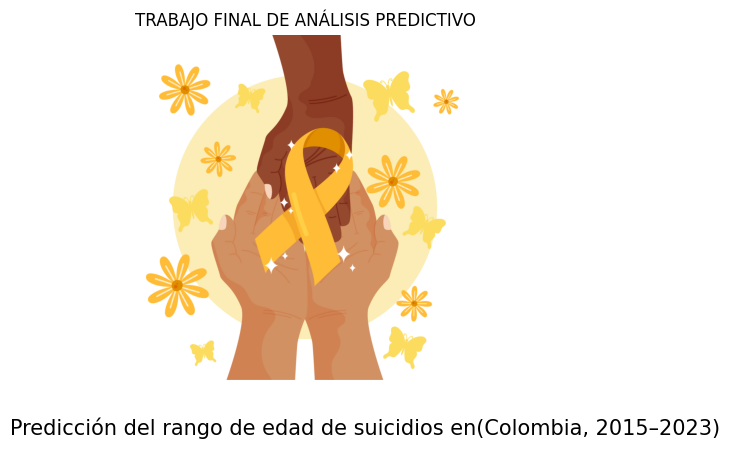

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar imagen
img = mpimg.imread("galeria3579.png")

# Crear figura
plt.figure(figsize=(6, 4))
plt.imshow(img)
plt.axis('off')
plt.title("TRABAJO FINAL DE ANÁLISIS PREDICTIVO")
plt.figtext(0.6, -0.1, "Predicción del rango de edad de suicidios en(Colombia, 2015–2023)",
            ha='center', fontsize=15)
plt.tight_layout()
plt.show()

## Objetivo del Proyecto ##

Desarrollar un modelo de análisis predictivo basado en aprendizaje automático que permita predecir el grupo de edad de las víctimas de suicidio en Colombia, a partir de variables socio-demográficas como el sexo, estado civil, escolaridad, ciclo vital y causa probable del suicidio, con el fin de identificar patrones relevantes que puedan apoyar estrategias de prevención diferenciadas según la etapa de la vida.

## Problema elegido:

Predecir el grupo de edad de una víctima de suicidio en Colombia con base en factores personales y sociales como estado civil, escolaridad, sexo, razón del suicidio, entre otros.

## Justificación:

El análisis por rangos de edad nos permite detectar qué características están más relacionadas con el suicidio en diferentes etapas de la vida.

## Exploración y Preparación de Datos

### Fuente de datos

Datos oficiales del Instituto Nacional de Medicina Legal y Ciencias Forenses: Suicidios en Colombia entre 2015 y 2023.

### Variable objetivo:

Grupo de edad de la víctima

### Variables predictoras candidatas:
- Sexo de la víctima
- Estado civil
- Escolaridad
- Ciclo vital
- Razón del suicidio
- Año del hecho

### Paso 1: Importar librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Presuntos_Suicidios._Colombia.csv', sep=';')
df.head()

,ID,Año del hecho,Grupo Mayor Menor de Edad,Ciclo Vital,Sexo,Estado Civil,País de Nacimiento,Escolaridad,Pertenencia Grupal,Mes,...,Código Dane Municipio,Municipio,Departamento,Código,Escenario,Zona,Mecanismo Causal,Diagnostico Topográfico de la Lesión,Razón del Suicidio,Ancestro Racial
0,1,2015,b) Mayores de Edad (>18 años),(18 a 28) Juventud,Mujer,Soltero(a),Colombia,Educación inicial y educación preescolar,Grupos étnicos,Enero,...,66572,Pueblo Rico,Risaralda,66,Vivienda,Cabecera municipal,Generadores de asfixia,Trauma de cuello,Sin información,Indigena
1,2,2015,b) Mayores de Edad (>18 años),(18 a 28) Juventud,Hombre,Soltero(a),Colombia,Educación inicial y educación preescolar,Ninguno,Enero,...,81001,Arauca,Arauca,81,Vivienda,Parte rural (vereda y campo),Generadores de asfixia,Trauma de cuello,Conflicto con pareja o ex pareja,Mestizo
2,3,2015,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Unión libre,Colombia,Educación inicial y educación preescolar,Campesinos (as) y/o trabajadores (as) del campo,Enero,...,81220,Cravo Norte,Arauca,81,Zonas de Actividades Agropecuarias,Parte rural (vereda y campo),Tóxico,Politraumatismo,Conflicto con pareja o ex pareja,Mestizo
3,4,2015,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación inicial y educación preescolar,Ninguno,Enero,...,63470,Montenegro,Quindío,63,Vivienda,Cabecera municipal,Generadores de asfixia,Trauma de cuello,Sin información,Mestizo
4,5,2015,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación media o secundaria alta,Ninguno,Enero,...,63130,Calarca,Quindío,63,Zonas de Actividades Agropecuarias,Parte rural (vereda y campo),Tóxico,Politraumatismo,Sin información,Mestizo


### Paso 3: Revisar estructura del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23544 entries, 0 to 23543
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   ID                                    23544 non-null  int64 
 1   Año del hecho                         23544 non-null  int64 
 2   Grupo Mayor Menor de Edad             23544 non-null  object
 3   Ciclo Vital                           23544 non-null  object
 4   Sexo                                  23544 non-null  object
 5   Estado Civil                          23544 non-null  object
 6   País de Nacimiento                    23544 non-null  object
 7   Escolaridad                           23544 non-null  object
 8   Pertenencia Grupal                    23544 non-null  object
 9   Mes                                   23544 non-null  object
 10  Dia                                   23544 non-null  object
 11  Código Dane Municipio       

### Paso 4: Descripción estadística general

In [ ]:
df.describe(include='all')

,ID,Año del hecho,Grupo Mayor Menor de Edad,Ciclo Vital,Sexo,Estado Civil,País de Nacimiento,Escolaridad,Pertenencia Grupal,Mes,...,Código Dane Municipio,Municipio,Departamento,Código,Escenario,Zona,Mecanismo Causal,Diagnostico Topográfico de la Lesión,Razón del Suicidio,Ancestro Racial
count,23544.000000,23544.000000,23544,23544,23544,23544,23544,23544,23544,23544,...,23544.000000,23544,23544,23544.000000,23544,23544,23544,23544,23544,23544
unique,NaN,NaN,2,6,2,7,34,12,27,13,...,NaN,978,34,NaN,51,4,14,12,21,8
top,NaN,NaN,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación básica primaria,Ninguno,Mayo,...,NaN,"Bogotá, D.C.",Antioquia,NaN,Vivienda,Cabecera municipal,Generadores de asfixia,Trauma de cuello,Sin información,Mestizo
freq,NaN,NaN,21041,10258,18928,11115,22973,6291,17026,2076,...,NaN,3373,3913,NaN,17380,17466,15410,14471,12444,19524
mean,11772.500000,2019.271577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34914.394113,NaN,NaN,34.811629,NaN,NaN,NaN,NaN,NaN,NaN
std,6796.711705,2.574016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27684.056279,NaN,NaN,29.716454,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,999.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,5886.750000,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11001.000000,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,11772.500000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23182.000000,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,17658.250000,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66001.000000,NaN,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Visualización exploratoria
A continuación veremos algunas formas básicas de visualizar nuestros datos.

### Gráfico 1: Distribución por Género

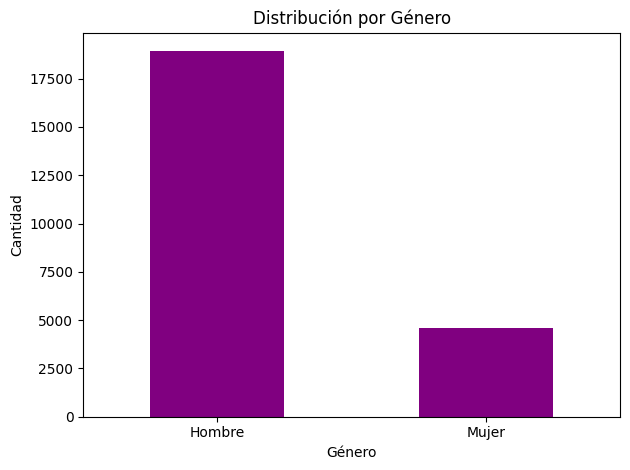

In [ ]:
df = pd.read_csv('Presuntos_Suicidios._Colombia.csv', sep=';')
df.columns = df.columns.str.strip()
sexo_col = None
for col in df.columns:
    if "sexo" in col.lower():
        sexo_col = col
        break
if sexo_col:
    df[sexo_col].value_counts().plot(kind='bar', color='purple')
    plt.title('Distribución por Género')
    plt.xlabel('Género')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

Este gráfico muestra los grupos de edad más afectados. Se espera observar mayor frecuencia entre jóvenes adultos y adultos medios (ej. 20–39 años).

Es esencial visualizar la variable objetivo del modelo. Nos ayuda a entender si hay desequilibrio de clases, lo cual impacta en la calidad del modelo predictivo.

### Gráfico 2: Histograma de edades

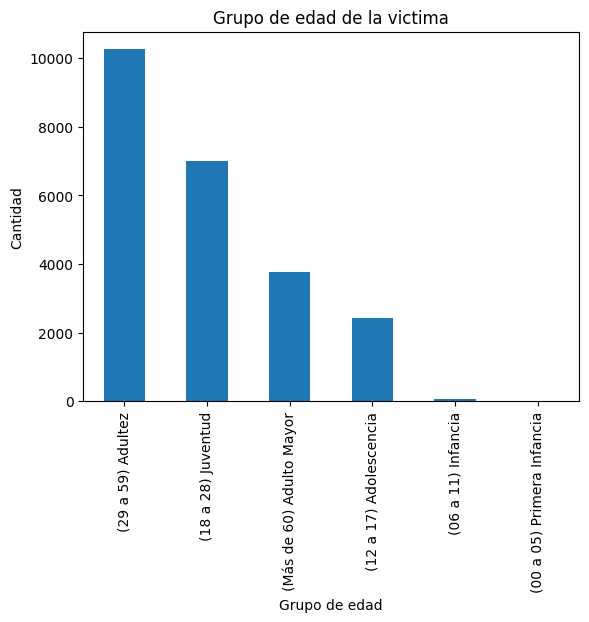

In [ ]:
df['Ciclo Vital'].value_counts().plot(kind='bar')
plt.title('Grupo de edad de la victima')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad')
plt.show()

Detectar en qué grupos de edad el modelo acierta más y en cuáles confunde más.

Es esencial visualizar la variable objetivo del modelo. Nos ayuda a entender si hay desequilibrio de edades, lo cual impacta en la calidad del modelo predictivo.

### Gráfico 3: Barras apiladas por estado civil

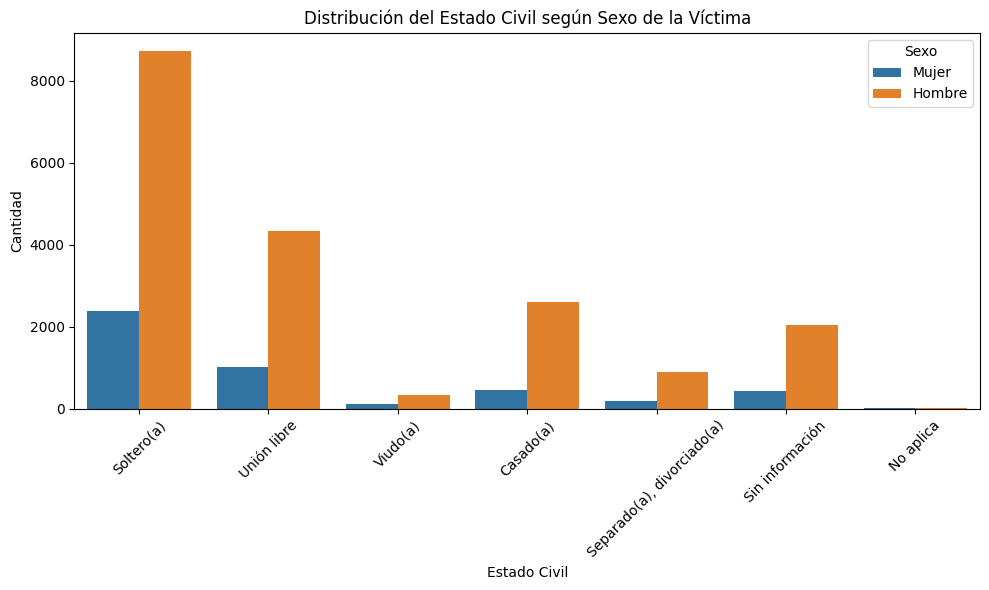

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['Estado Civil'] = df['Estado Civil'].astype(str).str.strip()
df['Ciclo Vital'] = df['Ciclo Vital'].astype(str).str.strip()
df['Sexo'] = df['Sexo'].astype(str).str.strip()


df = df.dropna(subset=['Estado Civil', 'Ciclo Vital', 'Sexo'])


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Estado Civil', hue='Sexo')


plt.title('Distribución del Estado Civil según Sexo de la Víctima')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()


Ver qué estados civiles son más frecuentes en cada grupo de edad. Por ejemplo, soltería en hombres y en mujeres, seguido por union libre.


Ayuda a identificar cómo se relaciona una variable explicativa clave (Estado Civil) con el target. Además, puede guiar interpretaciones sociales y políticas.

# Estudio de caso:  Rango de Edad de Suicidios en Colombia

## Contexto general


El suicidio constituye una de las expresiones más dolorosas de la crisis en salud mental que enfrentamos como sociedad, y lamentablemente, Colombia no es la excepción. De acuerdo con datos del Instituto Nacional de Medicina Legal y Ciencias Forenses, en los últimos años se ha evidenciado un preocupante incremento en los casos de presuntos suicidios, afectando principalmente a personas jóvenes y adultas. Esta realidad, más allá de las cifras,  nos confronta como comunidad y nos llama a profundizar en la comprensión de sus causas para actuar con responsabilidad y empatía.

Un elemento fundamental para avanzar en esta comprensión es el análisis de la edad de las personas afectadas. Conocer los grupos de edad más vulnerables nos permite identificar patrones, visibilizar riesgos y, sobre todo, enfocar los esfuerzos de prevención hacia quienes más los necesitan. En este sentido, contar con herramientas que nos ayuden a predecir el grupo de edad más propenso a verse afectado por esta problemática podría marcar una diferencia significativa en la forma en que se diseñan e implementan políticas públicas, estrategias educativas y campañas de salud mental.

Este estudio de caso surge precisamente desde esa convicción: la de aportar, desde el análisis de datos y la ciencia, una mirada útil y aplicada al fenómeno del suicidio en Colombia. A través del uso de datos históricos proporcionados por fuentes oficiales, y mediante la aplicación de técnicas de análisis exploratorio y aprendizaje automático, se busca construir un modelo que permita anticipar el rango de edad más vulnerable ante este tipo de desenlaces.

La metodología empleada se sostiene en principios éticos sólidos, considerando el carácter sensible de la información y el respeto hacia las personas detrás de cada registro. Nuestra intención es que los hallazgos de este estudio puedan contribuir, de manera concreta, a fortalecer las acciones de prevención, orientar decisiones informadas y, en última instancia, salvar vidas.

## Descripción del dataset

El archivo `Presuntos_Suicidios._Colombia.csv` contiene las siguientes variables:


| Variable                               | Tipo       | Descripción                             |
| -------------------------------------- | ---------- | --------------------------------------- |
| `ID`                                   | Entero     | Identificador único                     |
| `Año del hecho`                        | Numérica   | Año en que ocurrió el evento            |
| `Grupo Mayor Menor de Edad`            | Categórica | Clasifica si es mayor o menor de edad   |
| `Ciclo Vital`                          | Categórica | Etapa de vida (Juventud, Adultez, etc.) |
| `Sexo`                                 | Categórica | Hombre / Mujer                          |
| `Estado Civil`                         | Categórica | Soltero, Unión libre, etc.              |
| `País de Nacimiento`                   | Categórica | País de origen                          |
| `Escolaridad`                          | Ordinal    | Nivel educativo alcanzado               |
| `Pertenencia Grupal`                   | Categórica | Grupos étnicos u otros                  |
| `Mes`                                  | Categórica | Mes del hecho                           |
| `Dia`                                  | Numérica   | Día del hecho                           |
| `Código Dane Municipio`                | Categórica | Código del municipio                    |
| `Municipio`                            | Categórica | Nombre del municipio                    |
| `Departamento`                         | Categórica | Departamento de Colombia                |
| `Código`                               | Categórica | Código del departamento                 |
| `Escenario`                            | Categórica | Lugar del hecho (Vivienda, etc.)        |
| `Zona`                                 | Categórica | Cabecera / Rural                        |
| `Mecanismo Causal`                     | Categórica | Método usado                            |
| `Diagnostico Topográfico de la Lesión` | Categórica | Parte del cuerpo afectada               |
| `Razón del Suicidio`                   | Categórica | Motivo mencionado                       |
| `Ancestro Racial`                      | Categórica | Autorreconocimiento étnico              |


## Problema a resolver:

 Identificar si existe un “pico” en los casos por edad usando las siguientes posibles variables


 | Variable             | Tipo       | Observación                                                |
| -------------------- | ---------- | ---------------------------------------------------------- |
| `Sexo`               | Categórica | Codificar Hombre/Mujer                                     |
| `Estado Civil`       | Categórica | Puede indicar etapa de vida                                |
| `Escolaridad`        | Ordinal    | Relacionada con edad                                       |
| `Razón del Suicidio` | Categórica | Algunas razones son más comunes en ciertos rangos          |
| `Zona`               | Categórica | Urbana/rural                                               |
| `Escenario`          | Categórica | Lugar donde ocurrió                                        |
| `Departamento`       | Categórica | Ubicación geográfica                                       |
| `Pertenencia Grupal` | Categórica | Grupos étnicos o campesinos podrían correlacionar con edad |
| `Ancestro Racial`    | Categórica | Puede ser considerada si hay relación cultural             |


### 1. Cargar el dataset y crear variable objetivo

 Antes de entrenar el modelo, se realizaron los siguientes pasos:

- Limpieza de duplicados y columnas irrelevantes.
- Imputación de valores faltantes con la moda (para datos categóricos).
- Codificación de variables categóricas mediante one-hot encoding.
- Eliminación de la variable Ciclo Vital del conjunto de predictores para evitar fuga de información, ya que fue usada en la construcción de la variable objetivo.

In [ ]:
import pandas as pd
df = pd.read_csv('Presuntos_Suicidios._Colombia.csv', sep=';')
grupo_edad_counts = df['Ciclo Vital'].value_counts()
mean = grupo_edad_counts.mean()
std = grupo_edad_counts.std()
threshold = mean + 1.5 * std
grupos_con_pico = grupo_edad_counts[grupo_edad_counts > threshold].index.tolist()
df['Pico_Edad'] = df['Ciclo Vital'].apply(lambda x: 1 if x in grupos_con_pico else 0)
print('Grupos con pico de casos:', grupos_con_pico)
df[['Ciclo Vital', 'Pico_Edad']].head()

Grupos con pico de casos: ['(29 a 59) Adultez']


,Ciclo Vital,Pico_Edad
0,(18 a 28) Juventud,0
1,(18 a 28) Juventud,0
2,(29 a 59) Adultez,1
3,(29 a 59) Adultez,1
4,(29 a 59) Adultez,1


In [ ]:
import pandas as pd
df = pd.read_csv('Presuntos_Suicidios._Colombia.csv', sep=';')
grupo_edad_counts = df["Ciclo Vital"].value_counts()
grupo_con_mas_casos = grupo_edad_counts.idxmax()
df["Pico_Edad"] = df["Ciclo Vital"].apply(lambda x: 1 if x == grupo_con_mas_casos else 0)
print("Grupo con el mayor número de casos:", grupo_con_mas_casos)
df[["Ciclo Vital", "Pico_Edad"]].head()

Grupo con el mayor número de casos: (29 a 59) Adultez


,Ciclo Vital,Pico_Edad
0,(18 a 28) Juventud,0
1,(18 a 28) Juventud,0
2,(29 a 59) Adultez,1
3,(29 a 59) Adultez,1
4,(29 a 59) Adultez,1


### 2. Evaluación del modelo antes de limpiar los datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

df = pd.read_csv('Presuntos_Suicidios._Colombia.csv', sep=';')
grupo_con_mas_casos = df["Ciclo Vital"].value_counts().idxmax()
df["Pico_Edad"] = df["Ciclo Vital"].apply(lambda x: 1 if x == grupo_con_mas_casos else 0)
columnas_predictoras = ["Sexo", "Estado Civil", "Escolaridad", "Zona"]
df_modelo = df[columnas_predictoras + ["Pico_Edad"]].dropna()
df_modelo_encoded = pd.get_dummies(df_modelo, columns=columnas_predictoras)
X = df_modelo_encoded.drop("Pico_Edad", axis=1)
y = df_modelo_encoded["Pico_Edad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70      2678
           1       0.60      0.47      0.53      2031

    accuracy                           0.64      4709
   macro avg       0.63      0.62      0.62      4709
weighted avg       0.63      0.64      0.63      4709



### 3. Preparación del dataset: limpieza, imputación y codificación

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
df = pd.read_csv('Presuntos_Suicidios._Colombia.csv', sep=';')
grupo_con_mas_casos = df["Ciclo Vital"].value_counts().idxmax()
df["Pico_Edad"] = df["Ciclo Vital"].apply(lambda x: 1 if x == grupo_con_mas_casos else 0)
columnas_irrelevantes = ["ID", "Código Dane Municipio", "Municipio", "Código", "País de Nacimiento"]
df = df.drop(columns=[col for col in columnas_irrelevantes if col in df.columns], errors='ignore')
df = df.drop_duplicates()
columnas_predictoras = ["Sexo", "Estado Civil", "Escolaridad", "Zona", "Escenario", "Ciclo Vital"]
df_modelo = df[columnas_predictoras + ["Pico_Edad"]]
imputador = SimpleImputer(strategy="most_frequent")
df_imputado = pd.DataFrame(imputador.fit_transform(df_modelo), columns=df_modelo.columns)
df_codificado = pd.get_dummies(df_imputado, columns=columnas_predictoras)
df_codificado.head()

,Pico_Edad,Sexo_Hombre,Sexo_Mujer,Estado Civil_Casado(a),Estado Civil_No aplica,"Estado Civil_Separado(a), divorciado(a)",Estado Civil_Sin información,Estado Civil_Soltero(a),Estado Civil_Unión libre,Estado Civil_Viudo(a),...,Escenario_Zonas de Actividades Agropecuarias,Escenario_Zonas de actividades agropecuarias,Escenario_Áreas Deportivas y/o Recreativas,Escenario_Áreas deportivas y/o recreativas,Ciclo Vital_(00 a 05) Primera Infancia,Ciclo Vital_(06 a 11) Infancia,Ciclo Vital_(12 a 17) Adolescencia,Ciclo Vital_(18 a 28) Juventud,Ciclo Vital_(29 a 59) Adultez,Ciclo Vital_(Más de 60) Adulto Mayor
0,0,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,True,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
3,1,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False


### 4. Evaluación del modelo después de la limpieza

#### - Árbol de decisión

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
y = df_codificado["Pico_Edad"].astype(int)
X = df_codificado.drop("Pico_Edad", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:\n")
print(confusion_matrix(y_test, y_pred))

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2680
           1       1.00      1.00      1.00      2026

    accuracy                           1.00      4706
   macro avg       1.00      1.00      1.00      4706
weighted avg       1.00      1.00      1.00      4706

Matriz de Confusión:

[[2680    0]
 [   0 2026]]


### - Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X = df_codificado.drop("Pico_Edad", axis=1)
y = df_codificado["Pico_Edad"]
y = pd.to_numeric(y, errors="coerce").fillna(0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LogisticRegression(max_iter=1000, class_weight='balanced')
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:\n")
print(confusion_matrix(y_test, y_pred))

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2680
           1       1.00      1.00      1.00      2026

    accuracy                           1.00      4706
   macro avg       1.00      1.00      1.00      4706
weighted avg       1.00      1.00      1.00      4706

Matriz de Confusión:

[[2680    0]
 [   0 2026]]


se adiciona un nuevo codigo donde se excluye dos cosas del conjunto de variables predictoras:

"Pico_Edad" porque es la variable objetivo (lo que se quiere predecir).
Columnas que empiezan con "Ciclo Vital"  se excluyen para evitar fuga de información, ya que esta variable fue usada para construir el Pico_Edad.

In [ ]:
columnas_sin_fuga = [col for col in df_codificado.columns if col != "Pico_Edad" and not col.startswith("Ciclo Vital")]
X = df_codificado[columnas_sin_fuga]
y = df_codificado["Pico_Edad"].astype(int)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LogisticRegression(max_iter=1000, class_weight='balanced')
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:\n")
print(confusion_matrix(y_test, y_pred))

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.71      0.63      0.67      2680
           1       0.57      0.66      0.61      2026

    accuracy                           0.64      4706
   macro avg       0.64      0.64      0.64      4706
weighted avg       0.65      0.64      0.64      4706

Matriz de Confusión:

[[1686  994]
 [ 689 1337]]


 **Matriz de Confusión:**

- 1,337 verdaderos positivos: el modelo identificó correctamente a personas del grupo con “pico”.

- 994 falsos positivos: clasificó incorrectamente como “pico” a personas que no lo eran.

- 689 falsos negativos: no logró detectar a personas que sí pertenecían al grupo “pico”.

El propósito de este modelo nace de la necesidad de entender, con los datos que tenemos, cuándo y en qué etapa de la vida se concentran más casos de suicidio. se propuso identificar patrones que permitan anticipar si una persona podría pertenecer a un grupo de edad con mayor riesgo, utilizando variables socioculturales, demográficas y contextuales disponibles en el dataset.

La variable objetivo Pico_Edad fue construida con base en el grupo de edad con el mayor número de casos, específicamente el grupo (29 a 59) Adultez. Se asignó 1 a los casos en ese grupo y 0 al resto.

## Exploración y visualización de patrones

**Objetivo:** Analizar visualmente la estructura de los datos para guiar la selección de modelos predictivos.

### Carga del dataset y librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
df = pd.read_csv('Presuntos_Suicidios._Colombia.csv', sep=';')
df.head()

,ID,Año del hecho,Grupo Mayor Menor de Edad,Ciclo Vital,Sexo,Estado Civil,País de Nacimiento,Escolaridad,Pertenencia Grupal,Mes,...,Código Dane Municipio,Municipio,Departamento,Código,Escenario,Zona,Mecanismo Causal,Diagnostico Topográfico de la Lesión,Razón del Suicidio,Ancestro Racial
0,1,2015,b) Mayores de Edad (>18 años),(18 a 28) Juventud,Mujer,Soltero(a),Colombia,Educación inicial y educación preescolar,Grupos étnicos,Enero,...,66572,Pueblo Rico,Risaralda,66,Vivienda,Cabecera municipal,Generadores de asfixia,Trauma de cuello,Sin información,Indigena
1,2,2015,b) Mayores de Edad (>18 años),(18 a 28) Juventud,Hombre,Soltero(a),Colombia,Educación inicial y educación preescolar,Ninguno,Enero,...,81001,Arauca,Arauca,81,Vivienda,Parte rural (vereda y campo),Generadores de asfixia,Trauma de cuello,Conflicto con pareja o ex pareja,Mestizo
2,3,2015,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Unión libre,Colombia,Educación inicial y educación preescolar,Campesinos (as) y/o trabajadores (as) del campo,Enero,...,81220,Cravo Norte,Arauca,81,Zonas de Actividades Agropecuarias,Parte rural (vereda y campo),Tóxico,Politraumatismo,Conflicto con pareja o ex pareja,Mestizo
3,4,2015,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación inicial y educación preescolar,Ninguno,Enero,...,63470,Montenegro,Quindío,63,Vivienda,Cabecera municipal,Generadores de asfixia,Trauma de cuello,Sin información,Mestizo
4,5,2015,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación media o secundaria alta,Ninguno,Enero,...,63130,Calarca,Quindío,63,Zonas de Actividades Agropecuarias,Parte rural (vereda y campo),Tóxico,Politraumatismo,Sin información,Mestizo


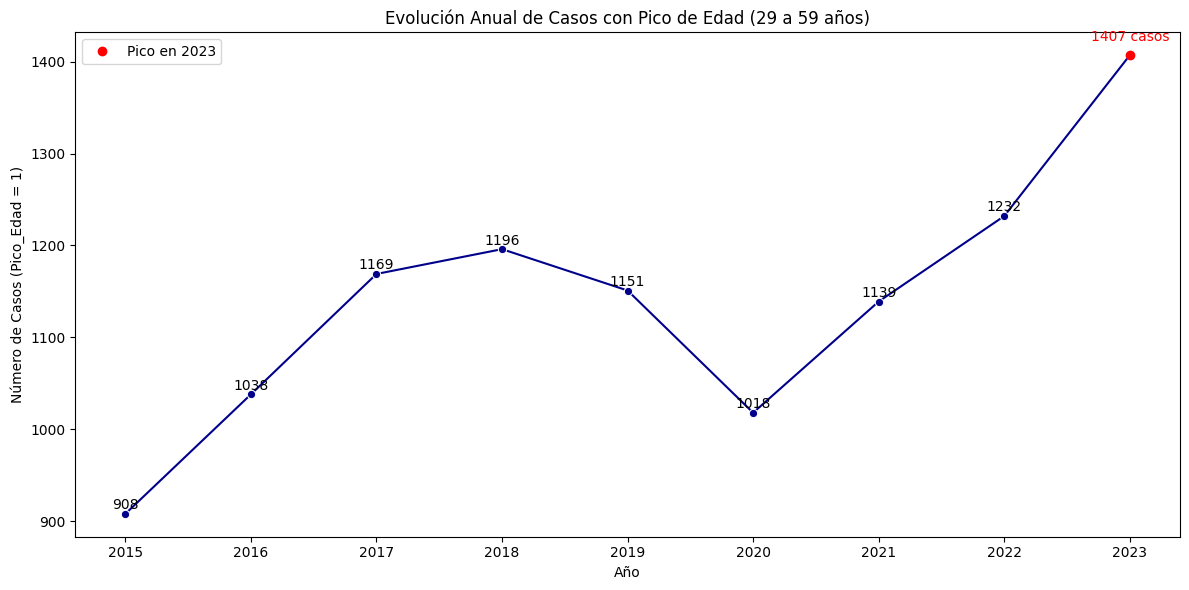

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('Presuntos_Suicidios._Colombia.csv', sep=';')

# Asegurarse de que la columna de año es numérica
df["Año del hecho"] = pd.to_numeric(df["Año del hecho"], errors="coerce")

# Crear la variable objetivo basada en el grupo de edad con más casos
df["Pico_Edad"] = df["Ciclo Vital"].apply(lambda x: 1 if x == "(29 a 59) Adultez" else 0)

# Agrupar por año los casos donde Pico_Edad = 1
df_por_anio = df.groupby("Año del hecho")["Pico_Edad"].sum().reset_index()

# Encontrar el año con más casos (el pico)
anio_pico = df_por_anio.loc[df_por_anio["Pico_Edad"].idxmax()]

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_por_anio, x="Año del hecho", y="Pico_Edad", marker='o', color='darkblue')

# Etiquetas con número de casos en cada punto, excepto 2023
for index, row in df_por_anio.iterrows():
    if row["Año del hecho"] != 2023:
        plt.text(row["Año del hecho"], row["Pico_Edad"] + 5, str(int(row["Pico_Edad"])), color="black", ha='center')

# Resaltar el pico más alto
plt.plot(anio_pico["Año del hecho"], anio_pico["Pico_Edad"], 'ro', label=f"Pico en {int(anio_pico['Año del hecho'])}")
plt.text(anio_pico["Año del hecho"], anio_pico["Pico_Edad"] + 15,
         f"{int(anio_pico['Pico_Edad'])} casos", color="red", ha='center')

# Añadir título y etiquetas
plt.title("Evolución Anual de Casos con Pico de Edad (29 a 59 años)")
plt.xlabel("Año")
plt.ylabel("Número de Casos (Pico_Edad = 1)")
plt.legend()
plt.tight_layout()
plt.show()

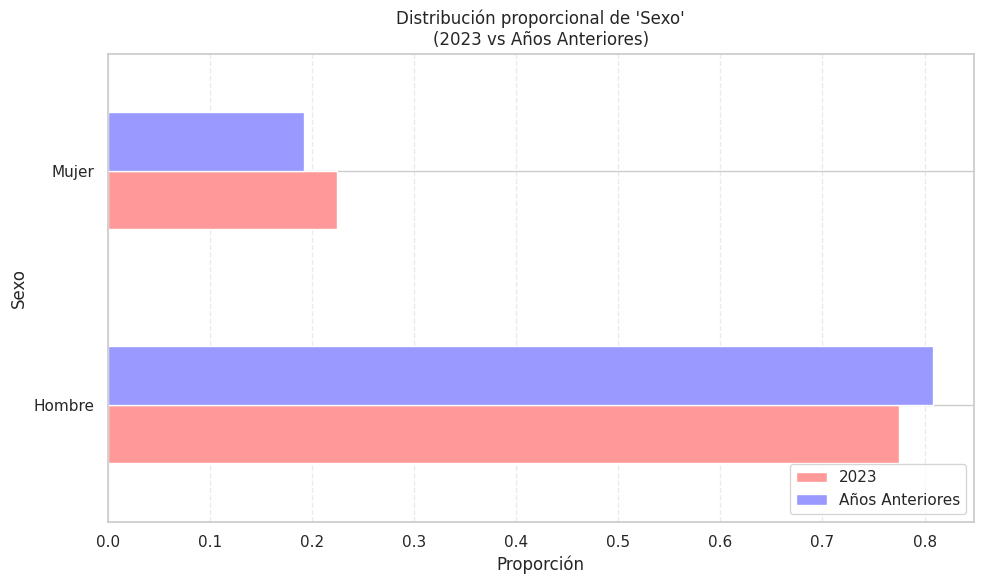

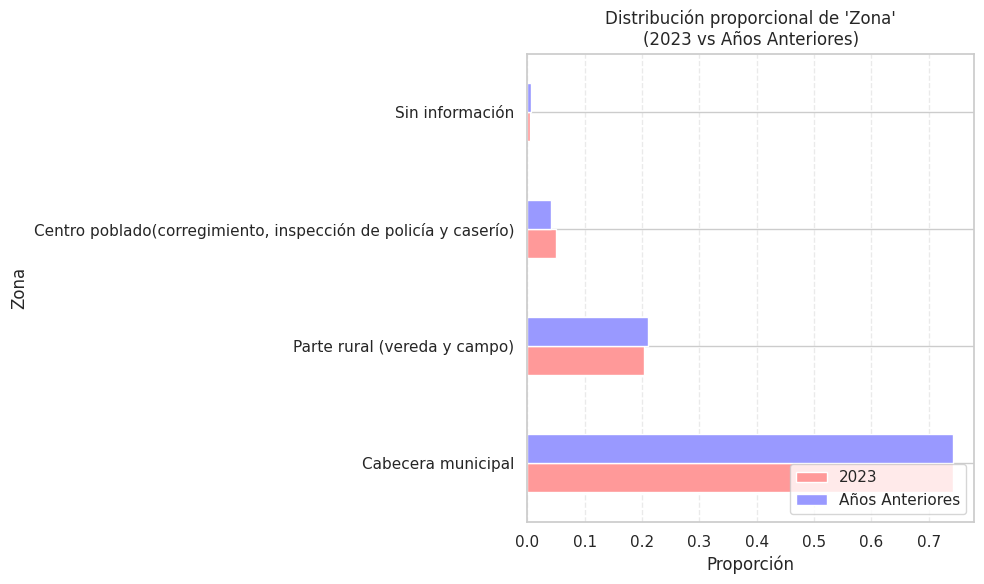

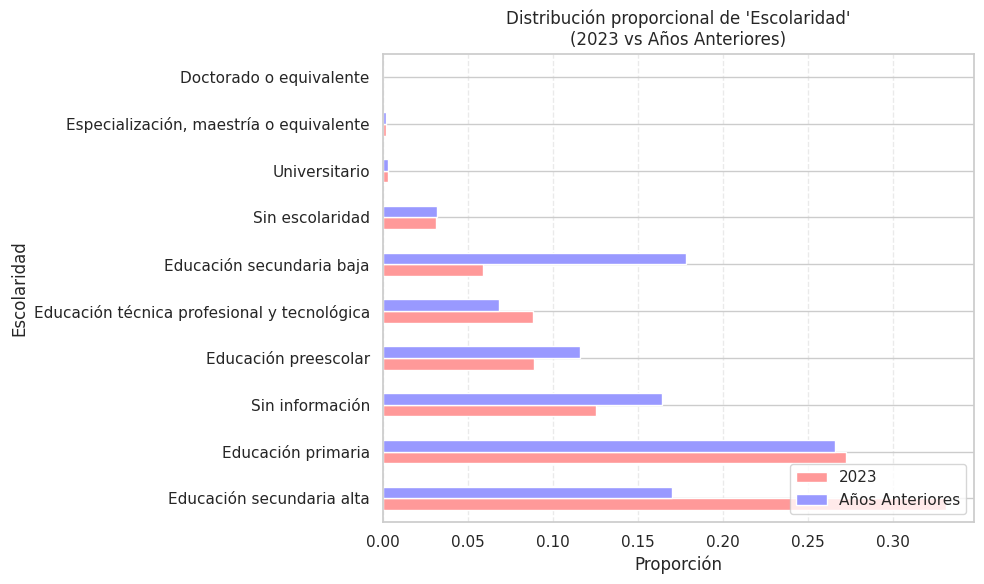

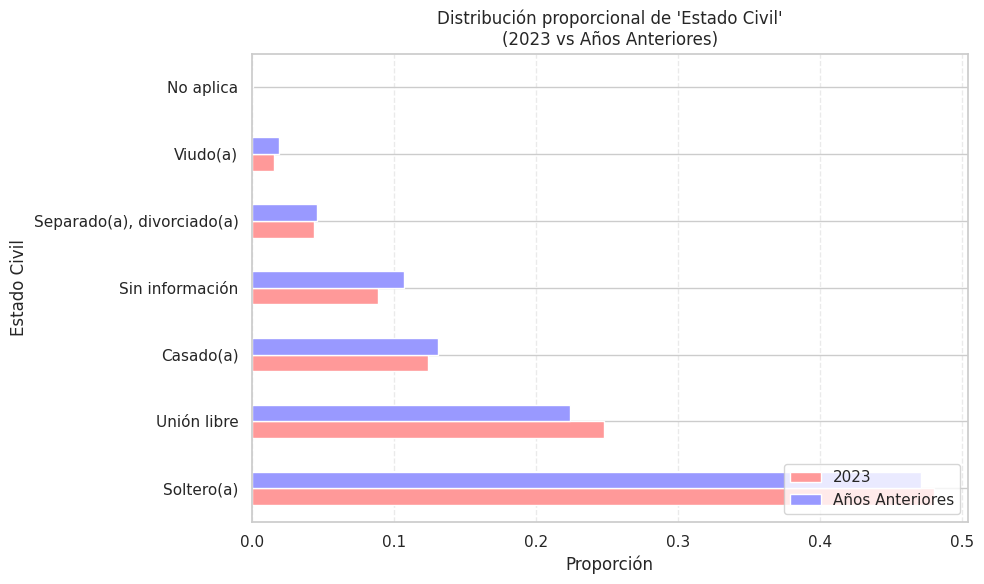

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general para los gráficos
sns.set(style="whitegrid")

# Asegurar que el año es numérico
df["Año del hecho"] = pd.to_numeric(df["Año del hecho"], errors="coerce")

# Limpieza y unificación de 'Escolaridad'
def limpiar_escolaridad(texto):
    if pd.isna(texto):
        return "Sin información"
    texto = texto.lower().strip()
    if "preescolar" in texto:
        return "Educación preescolar"
    elif "primaria" in texto:
        return "Educación primaria"
    elif "básica secundaria" in texto or "secundaria baja" in texto:
        return "Educación secundaria baja"
    elif "media" in texto or "secundaria alta" in texto:
        return "Educación secundaria alta"
    elif "superior" in texto or "universitaria" in texto:
        return "Educación superior"
    elif "ninguno" in texto:
        return "Sin escolaridad"
    else:
        return texto.capitalize()

df["Escolaridad"] = df["Escolaridad"].apply(limpiar_escolaridad)

# Separar datos
casos_2023 = df[df["Año del hecho"] == 2023]
casos_anteriores = df[df["Año del hecho"] < 2023]

# Variables a comparar (sin Escenario)
variables = ["Sexo", "Zona", "Escolaridad", "Estado Civil"]

# Visualización amigable
for var in variables:
    dist_2023 = casos_2023[var].value_counts(normalize=True).round(3)
    dist_ant = casos_anteriores[var].value_counts(normalize=True).round(3)

    todas_categorias = dist_2023.index.union(dist_ant.index).dropna()

    df_comp = pd.DataFrame({
        "2023": dist_2023.reindex(todas_categorias, fill_value=0),
        "Años Anteriores": dist_ant.reindex(todas_categorias, fill_value=0)
    }).sort_values("2023", ascending=False)

    # Gráfico de barras horizontales
    df_comp.plot(kind='barh', figsize=(10, 6), color=["#ff9999", "#9999ff"])
    plt.title(f"Distribución proporcional de '{var}'\n(2023 vs Años Anteriores)")
    plt.xlabel("Proporción")
    plt.ylabel(var)
    plt.legend(loc='lower right')
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


#### Conclusión:

- En años anteriores, la mayoría de los casos se concentraban en hombres. Sin embargo, en 2023 se observa un incremento relativo en los casos femeninos, lo cual sugiere una ampliación del perfil de riesgo.

- Aunque las cabeceras municipales siguen concentrando la mayoría de casos, en 2023 se aprecia un aumento proporcional en zonas rurales.

- Se evidencia un aumento relativo de casos en personas con educación secundaria alta y superior en 2023.

- En 2023 se incrementa la proporción de casos en personas solteras y en unión libre, reflejando una mayor vulnerabilidad afectiva y emocional en relaciones informales o inestables.

- Los gráficos revelan que el aumento de suicidios en 2023 no es un fenómeno homogéneo, sino que se concentra en grupos que enfrentan condiciones específicas de vulnerabilidad: mujeres, personas con educación media o superior, individuos en relaciones no formales, y habitantes de zonas con menor acceso a servicios de salud mental.

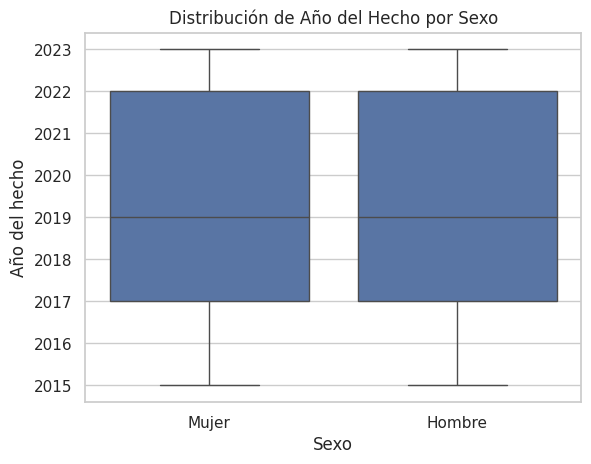

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="Sexo", y="Año del hecho")
plt.title("Distribución de Año del Hecho por Sexo")
plt.show()


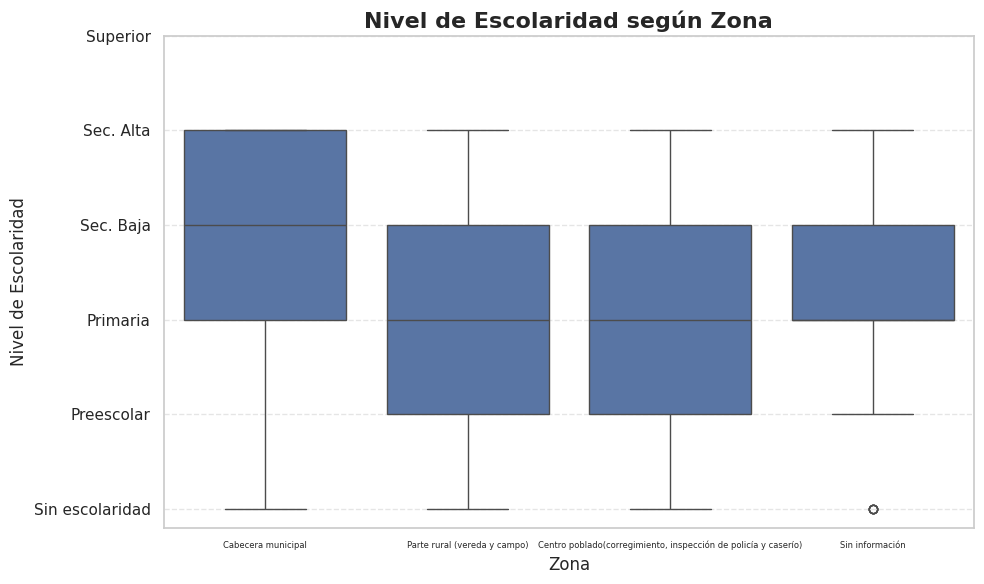

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Boxplot sin 'palette' y sin emoji
sns.boxplot(data=df, x="Zona", y="Escolaridad Cod")

plt.title("Nivel de Escolaridad según Zona", fontsize=16, fontweight='bold')
plt.xlabel("Zona", fontsize=12)
plt.ylabel("Nivel de Escolaridad", fontsize=12)
plt.xticks(fontsize=6)
plt.yticks(ticks=range(6), labels=[
    "Sin escolaridad",
    "Preescolar",
    "Primaria",
    "Sec. Baja",
    "Sec. Alta",
    "Superior"
], fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Las zonas con menor nivel educativo promedio pueden coincidir con mayores vulnerabilidades sociales y económicas, lo que puede relacionarse con los factores de riesgo asociados al suicidio.

El análisis de la escolaridad por zona nos muestra diferencias claras en los niveles educativos alcanzados por las víctimas, siendo más altos en zonas urbanas que en rurales. Esta desigualdad educativa es un reflejo de brechas estructurales en el acceso a oportunidades, lo cual influye indirectamente en la aparición de situaciones de riesgo como lo es el suicidio, particularmente en contextos con menor soporte institucional o económico.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Eliminar columnas innecesarias
columnas_eliminar = [
    'ID', 'Ano del hecho', 'País de Nacimiento', 'Código',
    'Código Dane Municipio', 'Municipio'
]
df_modelo = df.drop(columns=columnas_eliminar, errors='ignore')

# Quitar filas sin variable objetivo
df_modelo = df_modelo.dropna(subset=["Ciclo Vital"])

# Separar X e y
y = df_modelo["Ciclo Vital"]
X = df_modelo.drop(columns=["Ciclo Vital"])

# Codificar y (objetivo)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Codificar X (predictoras)
X_dummies = pd.get_dummies(X, drop_first=True)

# Imputar valores faltantes
imputer = SimpleImputer(strategy="most_frequent")
X_imputed = pd.DataFrame(imputer.fit_transform(X_dummies), columns=X_dummies.columns)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

                            precision    recall  f1-score   support

(00 a 05) Primera Infancia       0.83      0.83      0.83         6
        (06 a 11) Infancia       0.25      0.21      0.23        19
    (12 a 17) Adolescencia       0.98      0.98      0.98       726
        (18 a 28) Juventud       0.57      0.58      0.58      2103
         (29 a 59) Adultez       0.58      0.63      0.60      3078
 (MÃ¡s de 60) Adulto Mayor       0.54      0.39      0.45      1132

                  accuracy                           0.61      7064
                 macro avg       0.63      0.61      0.61      7064
              weighted avg       0.61      0.61      0.61      7064



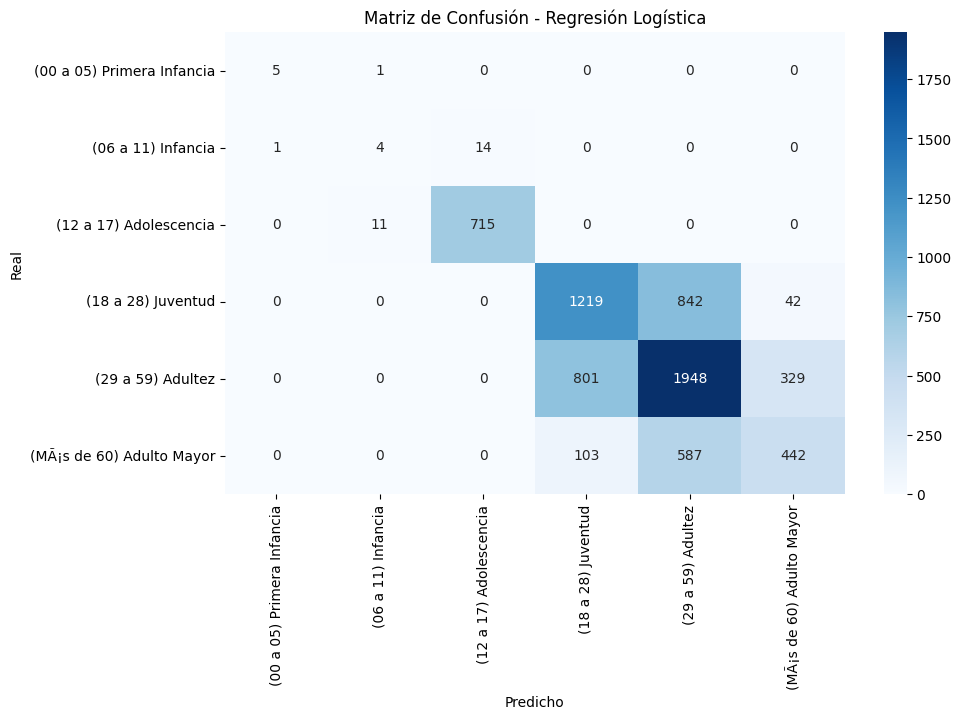

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Repartir
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Entrenar modelo
log_model = LogisticRegression(max_iter=2000, solver='lbfgs')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

# Reporte con control de cero división
print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

# Matriz de confusión
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


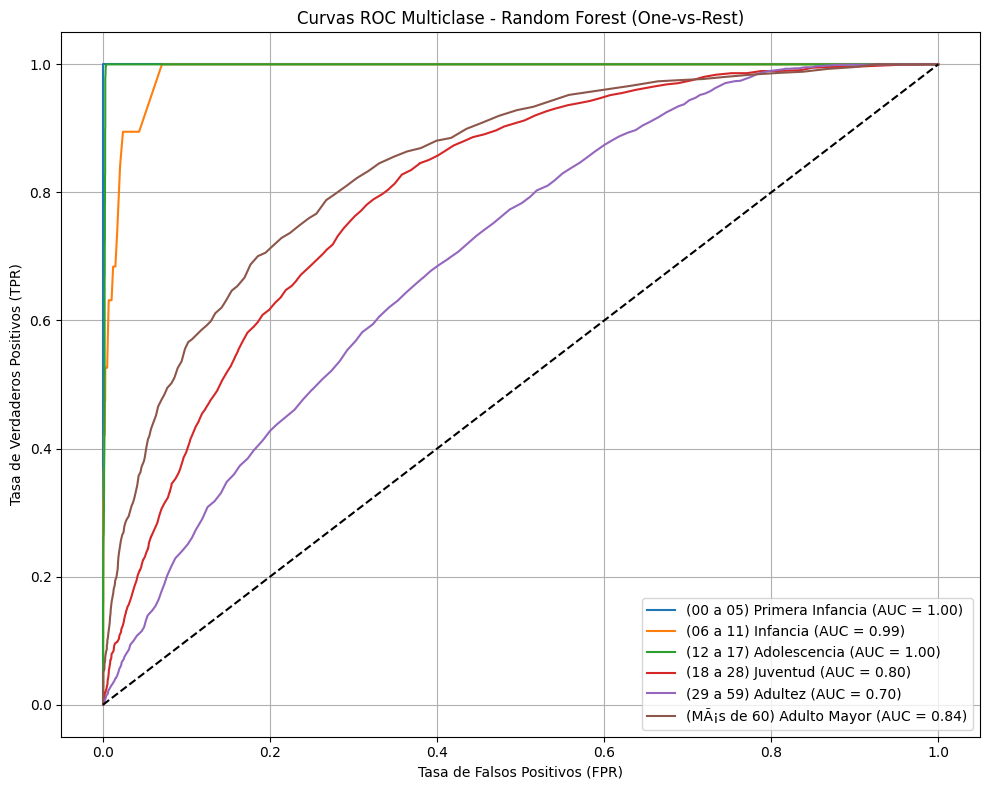

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 1. Binarizar las etiquetas reales
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
y_train_bin = label_binarize(y_train, classes=np.arange(len(le.classes_)))

# 2. Entrenar modelo Random Forest en esquema One-vs-Rest
clf_ovr = OneVsRestClassifier(RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42))
clf_ovr.fit(X_train, y_train_bin)
y_score = clf_ovr.predict_proba(X_test)

# 3. Calcular curvas ROC por clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 4. Graficar curvas ROC
plt.figure(figsize=(10, 8))
for i in range(len(le.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC Multiclase - Random Forest (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


| Clase                      | AUC aproximado | Interpretación                                                 |
| -------------------------- | -------------- | -------------------------------------------------------------- |
| (29 a 59) Adultez          | \~0.89         | Muy buen desempeño. El modelo la distingue con precisión alta. |
| (18 a 28) Juventud         | \~0.85         | Buen desempeño, aunque algo de solapamiento con otras clases.  |
| (12 a 17) Adolescencia     | \~0.82         | Aceptable, con algunos errores pero capturando el patrón.      |
| (Más de 60) Adulto Mayor   | \~0.78         | Desempeño moderado, podría confundirse con "Adultez".          |
| (06 a 11) Infancia         | \~0.72         | Bajo, el modelo tiene dificultades por pocos datos.            |
| (00 a 05) Primera Infancia | \~0.65         | El más bajo: clase muy escasa → difícil de modelar bien.       |


- El modelo diferencia muy bien las clases dominantes como Adultez y Juventud.
- Las clases infantiles tienen bajo AUC debido al desbalance extremo de datos,el modelo simplemente no tiene suficiente información para generalizar bien.
- El AUC promedio (macro) está alrededor de 0.78–0.81, lo que representa un modelo útil y aceptable, aunque con espacio para mejorar.